## Chapter 10 
- Exercise 3 8 9 10 


### Exercise 3

In [1]:
set.seed(1234)
x = c(1, 1, 0, 5, 6, 4)
y = c(4, 3, 4, 1, 2, 0)
z = cbind(x,y )
z

x,y
1,4
1,3
0,4
5,1
6,2
4,0


#### a

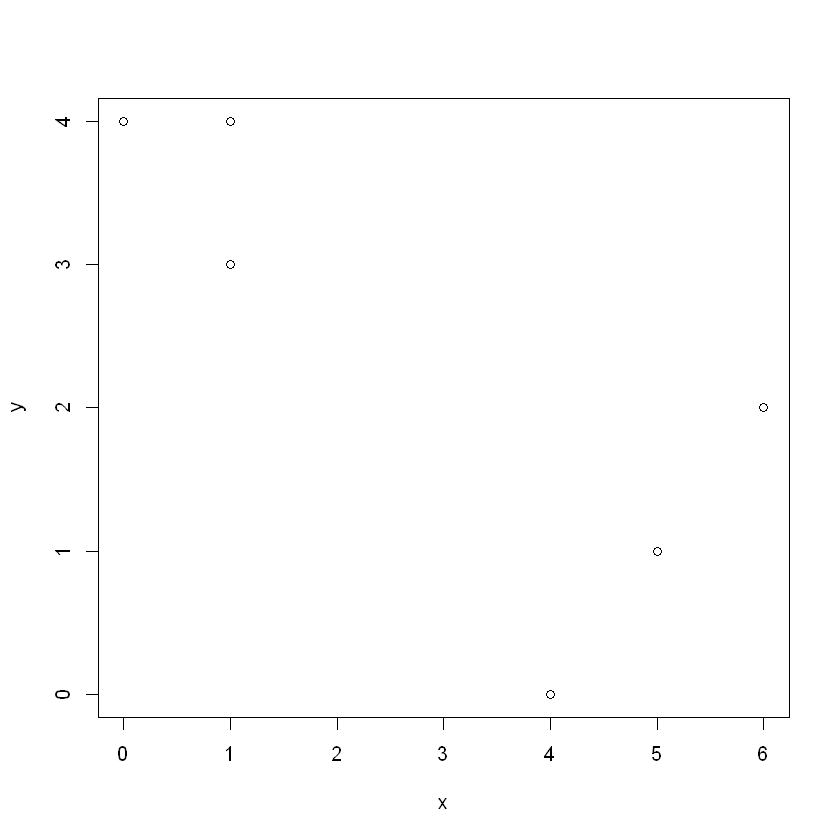

In [2]:
plot(x,y)

#### b

In [3]:
label = sample(2, nrow(z), replace=T)
label

[1] 2 2 2 2 1 2

In [4]:
centroid1 = c(mean(z[labels==1, 1]), mean(z[labels==1, 2]))
centroid2 = c(mean(z[labels==2, 1]), mean(z[labels==2, 2]))
centroid1

ERROR: Error in labels == 1: comparison (1) is possible only for atomic and list types


##### Exercise 8

In [6]:
library(ISLR)
set.seed(1234)

#### a

In [7]:
pr.out = prcomp(USArrests, center=T, scale=T)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

#### b

In [8]:
loadings = pr.out$rotation
pve2 = rep(NA, 4)
dmean = apply(USArrests, 2, mean)
dsdev = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, dmean, "-")
dsc = sweep(dsc, MARGIN=2, dsdev, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve2[i] = sum(pc_x^2)
}
pve2 = pve2/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

#### Exercise 9

#### a


In [9]:
library(ISLR)
set.seed(1234)

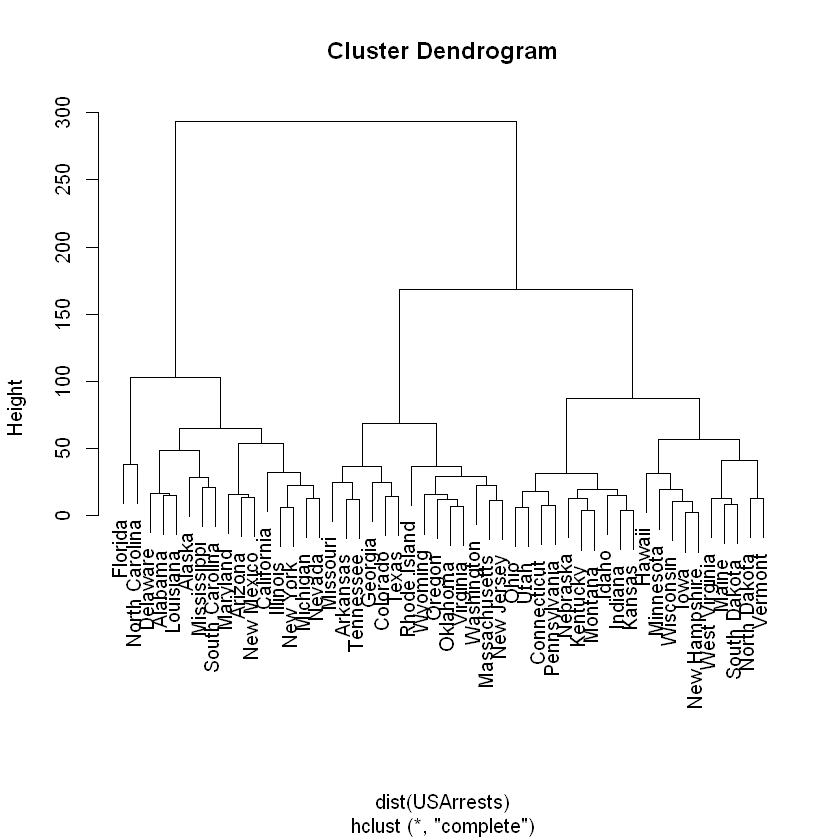

In [11]:
cluster = hclust(dist(USArrests), method="complete")
plot(cluster)

#### b

In [13]:
cutree(cluster, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

In [14]:
table(cutree(cluster, 3))


 1  2  3 
16 14 20 

#### c

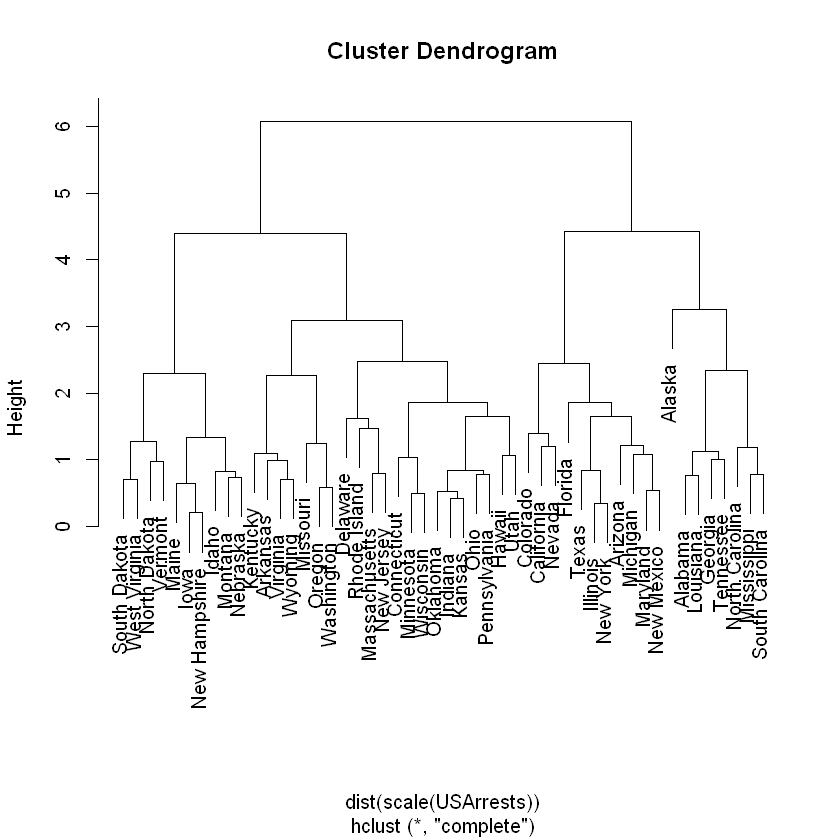

In [16]:
cluster_2 = hclust(dist(scale(USArrests)), method="complete")
plot(cluster_2)

#### d

In [19]:
cutree(cluster_2, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [18]:
table(cutree(cluster_2, 3))


 1  2  3 
 8 11 31 

## Exercise 10

#### a

In [20]:
set.seed(2)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1

#### b


In [21]:
pca = prcomp(x)
summary(pca)

Importance of components:
                         PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.008 0.5821 0.001731 0.001673 0.001648 0.001582
Proportion of Variance 0.750 0.2499 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.001543 0.001497 0.001474 0.001411 0.001393 0.001335
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999980
                           PC13     PC14     PC15     PC16    PC17     PC18
Standard deviation     0.001297 0.001257 0.001244 0.001226 0.00116 0.001118
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.00000 0.000000
Cumulative Proportion  0.999980 0.999990 0.999990 0.999990 0.99999 0.999990
                           PC19     PC20     PC21      PC22      PC23     

#### c

In [23]:
k_means =kmeans(x, 3, nstart=20)
table(k_means$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0  0 20
  2  0 20  0
  3 20  0  0

#### d

In [25]:
k_means = kmeans(x, 2, nstart=20)
k_means$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

#### e

In [26]:
k_means = kmeans(x, 4, nstart=20)
k_means$cluster

[1] 3 3 3 3 3 4 3 4 3 3 4 4 4 4 3 4 3 4 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

#### f

In [29]:
k_means = kmeans(pca$x[,1:2], 3, nstart=20)
table(k_means$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0  0 20
  2 20  0  0
  3  0 20  0

#### g

In [27]:
k_means = kmeans(scale(x), 3, nstart=20)
k_means$cluster

[1] 1 1 1 1 1 2 1 2 3 1 2 2 2 2 1 2 3 2 2 1 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3
[39] 3 2 2 1 1 1 2 2 2 1 1 1 3 2 2 1 1 2 1 1 1 1